# Heston 93 model

In finance, the Heston model, named after Steven Heston, is a mathematical model describing the evolution of the volatility of an underlying asset. It is a stochastic volatility model: such a model assumes that the volatility of the asset is not constant, nor even deterministic, but follows a random process.

Objective:

- Compute Random path with MC simulation

More about Derivatives [here](https://drive.google.com/open?id=1Pz23oqSVdAnt2ruj5DhXOjgqLjFzy6Hf)

## Basic Heston model

The basic Heston model assumes that $S_t$, the price of the asset, is determined by a stochastic process.

$$
d S_{t}=\mu S_{t} d t+\sqrt{\nu_{t}} S_{t} d Z_{t}^{S}
$$

where ${\displaystyle \nu _{t}}$, the instantaneous variance

$$
d \nu_{t}=\kappa\left(\theta-\nu_{t}\right) d t+\xi \sqrt{\nu_{t}} d Z_{t}^{\nu}
$$

and ${\displaystyle W_{t}^{S},W_{t}^{\nu }}$ are Wiener processes (i.e., random walks) with correlation $\rho$, or equivalently, with covariance $\rho \mathrm{dt}$

- $\mu$  is the rate of return of the asset.
- $\theta$ is the long variance, or long run average price variance; as t tends to infinity, the expected value of νt tends to θ.
- $\kappa$  is the rate at which νt reverts to θ.
- $\xi$  is the volatility of the volatility, or 'vol of vol', and determines the variance of νt.

## Parameter of the model

- Heston parameters	6/29/2018
- Kappa:	0.5485872
- Theta:	0.0462418
- Sigma:	0.2252450
- Rho:	-0.5014077
- V0:	0.0190355
- OIS: 0.00144
- Dividend: 0.02
- Spot: 105.42
- current date: 6/29/2018
- valuation date: 1/19/2021

# Computation Random path


## Calcul Heston

**Calcul Heston**
$$
Z1 = N(0,1) \\
Zt = N(0,1) \\
Z2 = \rho * Z1 + (1-\sqrt{\rho})^{0.5} * Zt
$$

In [1]:
import numpy as np

In [2]:
seed = np.random.RandomState(123456)
rho = -0.5014077 
iteration = 5

In [3]:
def Z(rho, iteration, seed):
    '''
    Calcule les parametres de correlation pour Heston
    '''
    Z1 = seed.normal(loc=0.0, scale=1.0, size = iteration)
    Zt = seed.normal(loc=0.0, scale=1.0, size = iteration)
    Z2 = rho * Z1 + np.power(1 - np.square(rho),0.5) * Zt
    return Z1, Z2

In [4]:
Z(rho, iteration, seed)

(array([ 0.4691123 , -0.28286334, -1.5090585 , -1.13563237,  1.21211203]),
 array([-0.38508376,  0.24497056, -0.14683104, -0.17626651, -2.42865904]))

## Random path

$$
Ds_t = Ds_{t-1} * (1 + (OIS - Dividend) *Dt )+ Dv_{t-1} * Dt ^{0.5} * Z2 \\
Dv_t = Dv_{t-1} + \kappa * (\theta - Dv_t) * Dt + \sigma * Dv_{t-1} * Dt ^ {0.5} * Z1
$$

$D_t = 1/252$

In [5]:
def random_path(Z1, Z2, dS, dVt, ois, dividend, kappa, theta, sigma):
    '''
    Genere un array de la dimension du nombre d'iteration
    La diffusion peut etre calculee selon 3 facons
    - Normal
    '''
    dDt = 1/252
    #Z1, Z2 = Z()
    dS = dS * (1 + (ois - dividend) * dDt + np.power(dVt * dDt, 0.5) * Z2)
    dVt = dVt + kappa*(theta - dVt) * dDt + sigma * \
        np.power(dVt * dDt, 0.5) * Z1
    dVt = np.abs(dVt)
    return dS, dVt


In [6]:
dS = 105.42
dVt = 0.0190355
ois = 0.00144
dividend =  0.02
kappa = 0.5485872
theta = 0.0462418
sigma = 0.2252450
Z1, Z2 = Z(rho, iteration, seed)

In [7]:
Z1, Z2 = Z(rho, iteration, seed)
random_path(
    Z1=Z1,
    Z2=Z2,
    dS=dS,
    dVt=dVt,
    ois=ois,
    dividend=dividend,
    kappa=kappa,
    theta=theta,
    sigma=sigma)

(array([106.17917572, 104.00048621, 105.26757002, 104.87722965,
        104.30841255]),
 array([0.01777587, 0.01931721, 0.01620047, 0.02012247, 0.019887  ]))

## Get maturity

Get number of days between two dates

In [8]:
#!pip install workalendar

In [9]:
from datetime import date
import pandas as pd
from workalendar.europe import France

In [10]:
def date_transformed(current_date, valuation_date):
    """
            La fonction calcule le nombre de jours avant une date de
             constatation/maturité;
            la date maximum rescale (jour/delta) et la liste des dates rescales
             si elle existe
            Si la liste des valuations_date a une seule valeur, ie la date de
             maturité alors
            le code va dans except
    """
    dDt = 252
    
    try:
        days_to_T = [
            cal.get_working_days_delta(x, current_date) for x in valuation_date
        ]
        days_to_T_scaled = [
            cal.get_working_days_delta(x, current_date) / dDt for x in valuation_date
        ]
        T_scale = max(days_to_T_scaled)
        return days_to_T, T_scale, days_to_T_scaled
    except:
        days_to_T = cal.get_working_days_delta(valuation_date, current_date)
        T_scale = cal.get_working_days_delta(
            valuation_date, current_date) / dDt
        return days_to_T, T_scale


In [11]:
current_date = "29/06/2018"
valuation_date = "19/01/2021"
cal = France()
current_date = pd.to_datetime(current_date, format = "%d/%m/%Y")
valuation_date = pd.to_datetime(valuation_date,
		 format = "%d/%m/%Y")

In [12]:
current_date

Timestamp('2018-06-29 00:00:00')

In [13]:
valuation_date

Timestamp('2021-01-19 00:00:00')

In [14]:
date_transformed(current_date, valuation_date)

(644, 2.5555555555555554)

## Compute the Random Path with MC simulation

We want to store the random path and get the average of tge DS at maturity

In [39]:
date_transformed_ = date_transformed(current_date, valuation_date)
days = np.array(date_transformed_[0])
maturity_days = np.max(days)
list_Ds = []
list_Dv = []

In [16]:
days

array(644)

In [17]:
maturity_days

644

Create an empty array with the first value of the model

In [48]:
iteration = 10000
ds_ = (np.ones((iteration,1)) * dS).flatten()
dv_ = (np.ones((iteration,1)) * dVt).flatten()
ds_.dtype

dtype('float64')

In [49]:
ds_[:10]

array([105.42, 105.42, 105.42, 105.42, 105.42, 105.42, 105.42, 105.42,
       105.42, 105.42])

In [ ]:
#path = [ds, dv]

Iterate

In [50]:
for n in range(1, maturity_days + 1):
    Z1, Z2 = Z(rho, iteration, seed)
    ds_, dv_ = random_path(Z1=Z1,
                       Z2=Z2,
                       dS= ds_,
                       dVt= dv_,
                       ois=ois,
                       dividend=dividend,
                       kappa=kappa,
                       theta=theta,
                       sigma=sigma
                      )
    
    list_Ds.append(ds_)
    list_Dv.append(dv_)
    
    ## Compute average last DS
    if n == maturity_days:
        avg = np.mean(ds_)

In [51]:
avg

100.21657005255422

In [44]:
len(list_Ds)

644

## Plot the Random path

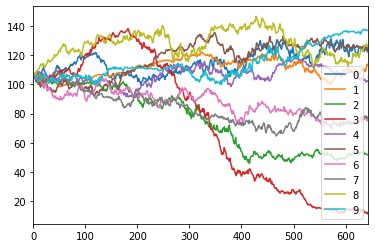

In [45]:
pd.DataFrame(np.transpose(list_Ds)).iloc[:10].transpose().plot()

## Compute DV

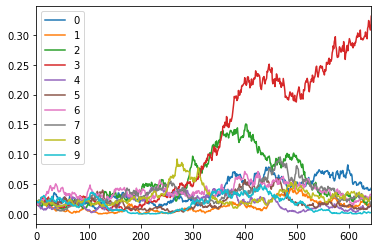

In [46]:
pd.DataFrame(np.transpose(list_Dv)).iloc[:10].transpose().plot()

# Your turn 

## Random path with forward diffusion

$$
Dst = Ds_t * (1 + (forward_t - Dividend) *Dt )+ Dv_t * Dt ^{0.5} * Z2 \\
Dvt = Dv_t + \kappa * (\theta - Dv_t) * Dt + \sigma * Dv_t * Dt ^ {0.5} * Z1
$$

Here is the list of forward

| Dates     | Taux forwards |
| --------- | ------------- |
| 9/24/2018 | -0.36%        |
| 9/24/2019 | -0.33%        |
| 9/24/2020 | -0.14%        |
| 9/17/2021 | 0.07%         |

Hint:

Pass a list of date in `date_transformed` and check when `n` is in `days` and slice `forward_rate` accordingly.

Remember to change the fonction `random_path`

In [ ]:
list_value = ['24/9/2018', '24/9/2019', '24/9/2020', '17/9/2021']
valuation_date = pd.to_datetime(list_value,
		 format = "%d/%m/%Y")
date_transformed_ = date_transformed(current_date, valuation_date)
days = np.array(date_transformed_[0])
days

In [ ]:
forward_rate = [-0.0036, -0.0033, -0.0014, 0.007]
i = 0
for n in range(1, maturity_days + 1):
    ### Do something
    if n in days:
        i += 1
        print(forward_rate[i])

In [ ]:
def random_path(Z1, Z2, dS, dVt, ois, dividend, kappa, theta, sigma,
                forward = None):
    '''
    Genere un array de la dimension du nombre d'iteration
    La diffusion peut etre calculee selon 3 facons
    - Normal
    '''
    dDt = 1/252
    #Z1, Z2 = Z()
    dS = dS * (1 + (forward - dividend) * dDt + np.power(dVt * dDt, 0.5) * Z2)
    dVt = dVt + kappa*(theta - dVt) * dDt + sigma * \
        np.power(dVt * dDt, 0.5) * Z1
    dVt = np.abs(dVt)
    return dS, dVt

In [20]:
date_transformed_ = date_transformed(current_date, valuation_date)
days = np.array(date_transformed_[0])
maturity_days = np.max(days)
list_Ds = []
list_Dv = []

iteration = 10000
ds = np.asarray(np.repeat(dS,iteration))
dv = np.asarray(np.repeat(dVt,iteration))
path = [ds, dv]

In [ ]:
i = 0
for n in range(1, maturity_days + 1):
    Z1, Z2 = Z(rho, iteration, seed)
    path = random_path(Z1=Z1,
                       Z2=Z2,
                       dS= path[0],
                       dVt= path[1],
                       ois=ois,
                       dividend=dividend,
                       kappa=kappa,
                       theta=theta,
                       sigma=sigma,
                       forward = forward_rate[i]
                      )
    if n in days:
        i += 1
    
    list_Ds.append(path[0])
    list_Dv.append(path[1])
    
    ## Compute average last DS
    if n == maturity_days:
        avg = np.mean(path[0])

In [ ]:
pd.DataFrame(np.transpose(list_Ds)).iloc[:10].transpose().plot()